In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train_X_CV.csv")
test=pd.read_csv("test_Y.csv")

In [3]:
print(train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:

print("Data Types  of Train Data Set")
print(train.dtypes)

Data Types  of Train Data Set
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [6]:
print("Attributes of Test Data Set")
print(test.columns)

Attributes of Test Data Set
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [7]:
print("Data Types  of Test Data Set")
print(test.dtypes)

Data Types  of Test Data Set
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [8]:
print("Row n Col of train")
print(train.shape)

Row n Col of train
(614, 13)


In [9]:
print("Row n Col of test")
print(test.shape)

print("Univariate Analysis train")
print(train['Loan_Status'].value_counts())

Row n Col of test
(367, 12)
Univariate Analysis train
Y    422
N    192
Name: Loan_Status, dtype: int64


In [10]:
print("Univariate Analysis test")
print(test['Gender'].value_counts())

Univariate Analysis test
Male      286
Female     70
Name: Gender, dtype: int64


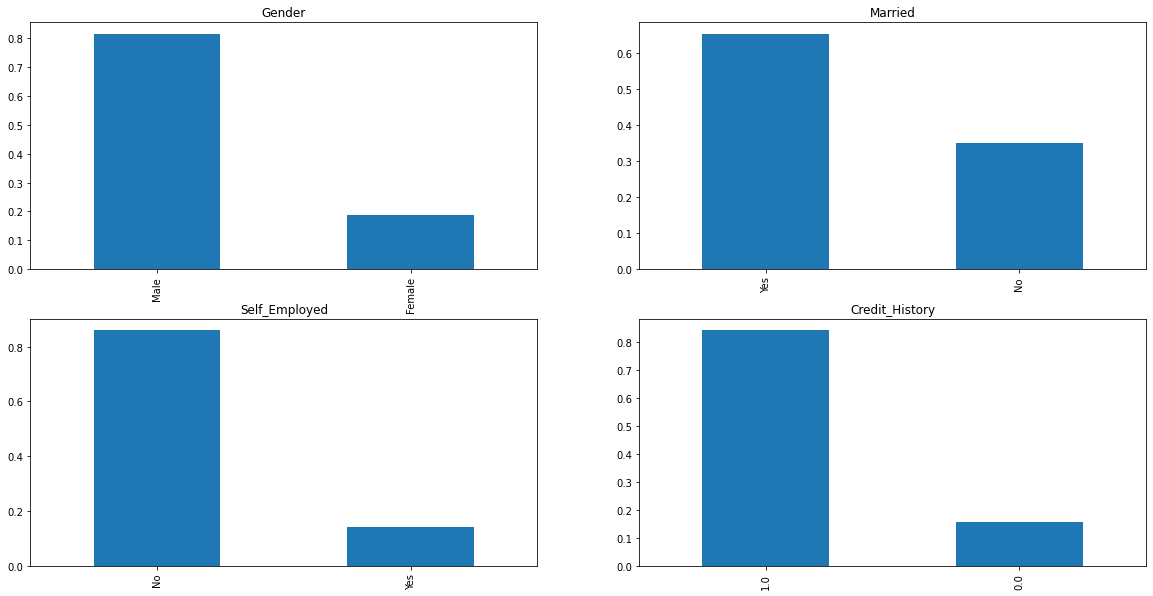

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

In [12]:
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [13]:
train.isnull().sum()

train["Gender"].fillna(train['Gender'].value_counts().idxmax(),inplace=True)
print(train['Gender'].isnull().sum())

train["Married"].fillna(train['Married'].value_counts().idxmax(),inplace=True)
print(train["Married"].isnull().sum())

train.Dependents.fillna(train.Dependents.value_counts().idxmax(),inplace=True)
print(train.Dependents.isnull().sum())

train.Self_Employed.fillna(train.Self_Employed.value_counts().idxmax(),inplace=True)
print(train.Self_Employed.isnull().sum())


train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())
print(train.LoanAmount.isnull().sum())

train.Credit_History=train.Credit_History.fillna(train.Credit_History.mean())
print(train.Credit_History.isnull().sum())

train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean())
print(train.Loan_Amount_Term.isnull().sum())

0
0
0
0
0
0
0


In [14]:
cateagorical_data=[]
Numerical_data=[]

for i,c in enumerate(train.dtypes):
    if c==object:
        cateagorical_data.append(train.iloc[:,i])
    else:
        Numerical_data.append(train.iloc[:,i])
print(cateagorical_data)


[0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object, 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object, 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object, 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object, 0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object,

In [15]:
print(Numerical_data)

[0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64, 0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64, 0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64, 0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64, 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float

In [16]:
cateagorical_data=pd.DataFrame(cateagorical_data).transpose()
Numerical_data=pd.DataFrame(Numerical_data).transpose()

In [17]:
cateagorical_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [18]:
cateagorical_data=cateagorical_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cateagorical_data.isnull().sum().any()

False

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

Label_value={"Y":0,"N":1}
Label=cateagorical_data["Loan_Status"]
cateagorical_data.drop("Loan_Status",axis=1,inplace=True)
Label=Label.map(Label_value)

In [20]:
for i in cateagorical_data:
    cateagorical_data[i]=LE.fit_transform(cateagorical_data[i])

In [21]:
from sklearn.model_selection import train_test_split
X=pd.concat([cateagorical_data,Numerical_data],axis=1)
Y=Label

In [22]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0
3,3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0
4,4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0
610,610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0
611,611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0
612,612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0


In [23]:
Y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

### modeling
For the process of modelling we have to first split the data into Train and Test data .

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=28)

In [25]:
x_train,x_test

(     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
 486      486       1        0           2          0              0   
 308      308       1        0           0          0              0   
 598      598       1        1           0          0              1   
 134      134       1        0           0          0              0   
 228      228       1        1           0          0              0   
 ..       ...     ...      ...         ...        ...            ...   
 259      259       1        1           3          1              0   
 32        32       1        0           1          0              1   
 278      278       1        1           0          0              0   
 517      517       1        1           0          1              0   
 257      257       1        1           3          0              0   
 
      Property_Area  ApplicantIncome  CoapplicantIncome  LoanAmount  \
 486              0           3547.0                0.0        

In [26]:
y_train,y_test

(486    1
 308    1
 598    0
 134    0
 228    0
       ..
 259    1
 32     1
 278    0
 517    1
 257    1
 Name: Loan_Status, Length: 429, dtype: int64,
 406    0
 502    0
 403    0
 46     0
 247    0
       ..
 177    1
 281    0
 438    1
 520    0
 457    1
 Name: Loan_Status, Length: 185, dtype: int64)

Here we can see that we have done the 70% train and 30% split.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

models={"LogisticRegression":LogisticRegression(random_state=28),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=1,random_state=28),
        "RandomForestClassifier":RandomForestClassifier(n_estimators=400,oob_score=True,random_state=28,n_jobs=-1),
        "AdaBoostClassifier":AdaBoostClassifier(random_state=28)
        }

Now we wil import the models we want to use:

* LogisticRegression

* KNeighborsClassifier

* DecisionTreeClassifier

* RandomForestClassifier

* AdaBoostClassifier

Notice:- that we have kept the random see to 28 so that every time we run it, selects the same randomness and we get the same output.

In [28]:
models[sklearn.linear_model._logistic.LogisticRegression]

NameError: name 'sklearn' is not defined

In [ ]:
from sklearn.metrics import precision_score,accuracy_score

def loss(y_true,y_pred,retu=False):
    pre=precision_score(y_true,y_pred)
    acc=accuracy_score(y_true,y_pred)


    if retu:
        return pre,acc
    else:
        print(' pre: %.3f\n  acc: %.3f\n '%(pre,acc))

Now models have been built we,will like to see how well they perform for that we are suing the 2 score.

* precision_score

* accuracy_score

At last we will print the accucracy of all the models.

In [ ]:
def train_pred_score(models,x,y):
    for name,model in models.items():
        print(name," :")
        model.fit(x,y)
        loss(y,model.predict(x))
        print("-"*30)
train_pred_score(models,x_train,y_train)

**Form the various model we have plot here we can see that AdaBoostClassifier is performing the best as ,it is classifying all the Data points which were not classified in the first stumps and so on.**


We could do a ensemble modelling to (votting) but
as our model reached 91% it not recommended to do ensemble,
you can try in will enventually will decrease the accuracy.

In [ ]:
plt.figure(1)
plt.subplot(221)
print(train['Loan_Status'].value_counts().plot.bar())
plt.show()
plt.subplot(222)
print(test['Loan_Status'].value_counts().plot.bar())
plt.show()